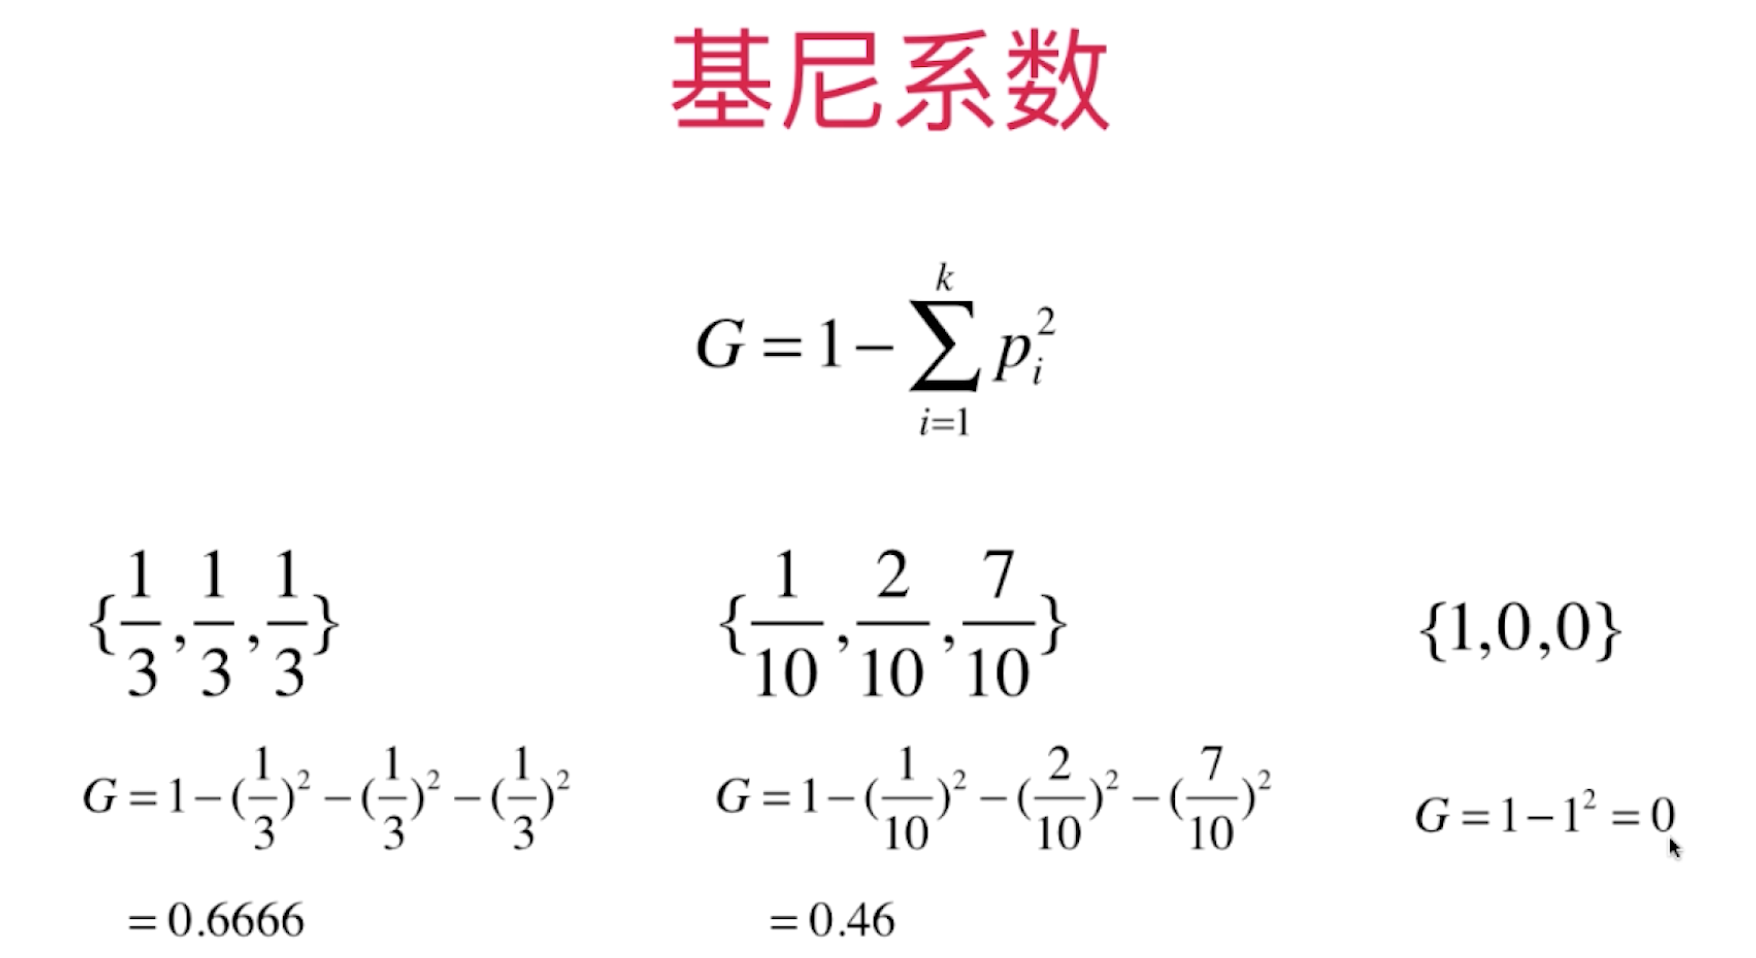

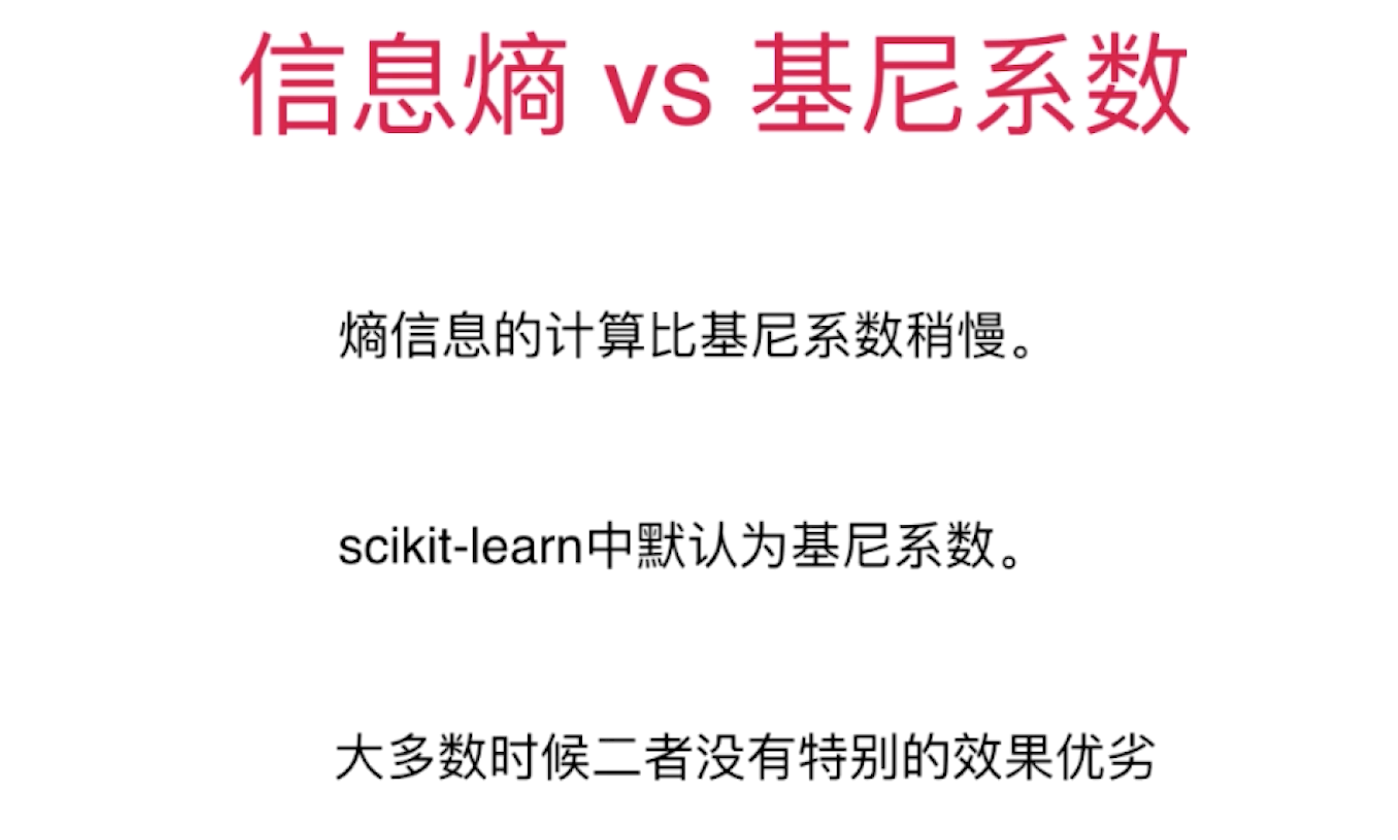

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="gini")    # criterion="gini"
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
# 绘制不规则决策边界的函数
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


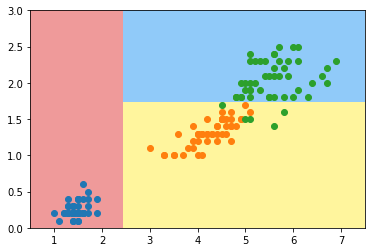

In [8]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0],  X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

### 模拟使用基尼系数划分

In [13]:
from collections import Counter
from math import log

def split(X, y, d, value):
    index_a = (X[:, d] <= value)
    index_b = (X[:, d] >   value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res -= p**2
    return res

def try_split(X, y):
    best_gini = 1e9
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        '''对每个特征求出特征值最小的划分值'''
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            '''划分值是两个相邻样本点中间值'''
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                '''左右两边分别求出gini值，比如说最好情况是左边{1,...,0},右边{0,...,1}'''
                e = gini(y_l) + gini(y_r)
                if e < best_gini:
                    best_gini, best_d, best_v = e, d, v
    return best_gini, best_d, best_v

In [14]:
best_gini, best_d, best_v = try_split(X, y)
print("best_gini = ", best_gini)
print("best_d =", best_d)
print("best_v =", best_v)

best_gini =  0.5
best_d = 0
best_v = 2.45


In [15]:
### 上述可以看出最好的结果是以特征d=0列、数值2.45划分，能得到一次最小的gini值
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [18]:
print(y1_l)
print(gini(y1_l))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.0


In [17]:
print(y1_r)
print(gini(y1_r))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
0.5


In [21]:
# 第二次划分

best_gini2, best_d2, best_v2 = try_split(X1_r, y1_r)
print("best_gini2 = ", best_gini2)
print("best_d2 =", best_d2)
print("best_v2 =", best_v2)

best_gini2 =  0.2105714900645938
best_d2 = 1
best_v2 = 1.75


In [22]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [23]:
print(y2_l)
print(gini(y2_l))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2]
0.1680384087791495


In [24]:
print(y2_r)
print(gini(y2_r))

[1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
0.04253308128544431


# 但两次划分都可以    以同一纬度划分！！！！！！